Exploration, Analysis and Model Creation

Link For [Kaggle Auto-mpg dataset](https://www.kaggle.com/devanshbesain/exploration-and-analysis-auto-mpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from scipy.stats import norm
from scipy import stats

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
import joblib

In [5]:
data = pd.read_csv('auto-mpg.csv')

In [6]:
data.drop(['car name'],axis=1,inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [7]:
print(f'Shape of the Data : {data.shape}')

Shape of the Data : (398, 8)


In [8]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

#### Data type of horsepower is object.

In [9]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
data = data[data.horsepower != '?']

#### So there it is..lots of numbers. We can see that the dataset has the following columns (with their type):
- mpg: continuous
- cylinders: multi-valued discrete
- displacement: continuous
- horsepower: continuous
- weight: continuous
- acceleration: continuous
- model year: multi-valued discrete
- origin: multi-valued discrete
- car name: string (unique for each instance)

### Missing Value Treatment

In [11]:
def missing_values(df):
    missing_columns = [column for column in df.columns if df[column].isnull().sum() > 0]
    no_of_missing_value = [missing for missing in df.isnull().sum() if missing > 0]
    return list(zip(missing_columns, no_of_missing_value))

In [12]:
missing_values(data)

[]

In [13]:
#### Describe the Data
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [14]:
data['horsepower'] = pd.to_numeric(data['horsepower'])

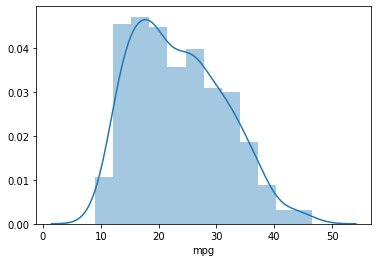

In [15]:
sns.distplot(data['mpg'])

In [16]:
print(f"Skewness:  {data['mpg'].skew()}")
print(f"Kurtosis:  {data['mpg'].kurt()}")

Skewness:  0.45709232306041025
Kurtosis:  -0.5159934946351457


In [17]:
data.corr()['mpg'].sort_values()

weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
mpg             1.000000
Name: mpg, dtype: float64

In [18]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            388, 389, 390, 391, 392, 393, 394, 395, 396, 397],
           dtype='int64', length=392)

In [19]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [20]:
independent_varible = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']

In [21]:
X = pd.DataFrame(data[independent_varible].copy())
y = data['mpg'].copy()

In [22]:
#X = StandardScaler().fit_transform(X)

In [23]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=12)

In [24]:
regressor = GradientBoostingRegressor().fit(train_X, train_y)

In [25]:
pred_y = regressor.predict(test_X)

In [26]:
print(regressor.score(test_X,test_y))

0.8255804256589552


In [27]:
mean_squared_error(test_y, pred_y)

11.862463336775715

In [28]:
filename = "autompg.pkl"

In [29]:
joblib.dump(regressor,filename)

['autompg.pkl']

In [30]:
model = joblib.load(filename)

In [31]:
model.predict(test_X)

array([26.87892726, 29.47726466, 22.66815306, 14.15898669, 36.23086539,
       29.68848015, 21.87331836, 27.76060019, 36.67129988, 30.97415117,
       15.83860235, 18.30487871, 24.68517671, 18.02289677, 13.31685151,
       20.89249582, 39.64580216, 36.40156027, 12.92318097, 25.79067901,
       27.39002788, 12.8063822 , 21.34659152, 32.55665804, 31.17063791,
       23.62242335, 32.68853922, 16.72008553, 19.91969302, 14.08275156,
       19.54850198, 27.06723691, 17.46050837, 20.81659419, 15.65993739,
       26.89727377, 39.10614775, 30.47090232, 14.88462491, 29.46677604,
       37.75317753, 25.49309792, 34.95096711, 35.45897496, 23.90921756,
       25.82587153, 30.86385635, 21.40613044, 15.15819594, 23.10080163,
       20.60064292, 25.29773435, 21.27317822, 19.54319791, 31.31250251,
       41.21930121, 33.32730987, 30.86270489, 34.52667541, 36.23086539,
       18.92515754, 13.19749109, 17.78532794, 13.00595768, 25.59418299,
       19.83389692, 19.8893359 , 31.97634632, 16.14964955, 37.35

In [32]:
value = [8,74,65,2000,20,40,70]
value = np.array(value).reshape(-1, 7)
print(value.shape)
print(value)
#value = StandardScaler().fit_transform(value)
print(value)
result = model.predict(value)
print(result)

(1, 7)
[[   8   74   65 2000   20   40   70]]
[[   8   74   65 2000   20   40   70]]
[29.86836927]
